## Homework

1. **Tokenization** 

Write a generic Python tokenizer, which takes a set of text lines and tabulates the different words (that is, the tokens will be simply English words), keeping track of the frequency of each word.  Use the guidance in the accompanying notebook, 'Homework_1.ipynb'.

2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

### 1. **Tokenization** 

### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

## Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.



In [2]:
import re
import string

# Prepare a translation table to remove punctuation
trans_table = str.maketrans('', '', string.punctuation)
# Define a regular expression to match non-ASCII characters
non_ascii_re = re.compile(r'[^\x00-\x7F]+')

wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        # Remove non-ASCII characters
        line = non_ascii_re.sub('', line)
        # Convert to lowercase
        line = line.lower()
        # Remove punctuation
        line = line.translate(trans_table)
        
        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('the', 9255)
('project', 90)
('gutenberg', 87)
('ebook', 13)
('of', 4532)
('life', 89)
('on', 947)
('mississippi', 159)
('this', 781)
('is', 1148)
('for', 1095)
('use', 48)
('anyone', 5)
('anywhere', 18)
('in', 2593)
('united', 37)
('states', 54)
('and', 5892)
('most', 124)
('other', 270)
('parts', 9)
('world', 68)
('at', 750)
('no', 422)
('cost', 25)
('with', 1081)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1033)
('may', 89)
('copy', 17)
('it', 2293)
('give', 81)
('away', 172)
('or', 581)
('reuse', 2)
('under', 119)
('terms', 26)
('license', 24)
('included', 3)
('online', 4)
('wwwgutenbergorg', 5)
('if', 381)
('are', 387)
('not', 722)
('located', 9)
('will', 301)
('have', 571)
('to', 3592)
('check', 4)
('laws', 17)
('country', 77)
('where', 174)
('before', 208)
('using', 11)
('title', 3)
('author', 3)
('mark', 24)
('twain', 26)
('release', 1)
('date', 18)
('july', 7)
('10', 10)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 13)
('2021', 1

## Part 2: Add code to sort the contents of wdict by word occurrence frequency.  

What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

In [4]:
from collections import Counter
import re
import string
from operator import itemgetter

# Simulate reading from a file by defining a text variable
# For demonstration purposes, let's define a small piece of text
# This should be replaced by file reading in actual implementation
text = """
This is a simple example. 
This example includes several words, some of them repeated. 
Words are repeated to demonstrate the counting functionality.
"""

# Prepare a translation table to remove punctuation
trans_table = str.maketrans('', '', string.punctuation)
# Define a regular expression to match non-ASCII characters
non_ascii_re = re.compile(r'[^\x00-\x7F]+')

wdict = Counter()

# Simulate reading lines from a file
lines = text.split('\n')
for line in lines:
    # Remove non-ASCII characters
    line = non_ascii_re.sub('', line)
    # Convert to lowercase
    line = line.lower()
    # Remove punctuation
    line = line.translate(trans_table)
    
    words = line.split()
    wdict.update(words)

# Sort the dictionary by frequency in descending order
sorted_wdict = sorted(wdict.items(), key=itemgetter(1), reverse=True)

# Print the top 100 most frequent word tokens
print("Top 100 most frequent word tokens:")
for word, freq in sorted_wdict[:100]:
    print(f"{word}: {freq}")

# Calculate the number of words making up the top 90% of occurrences
total_occurrences = sum(wdict.values())
top_90_percent_cutoff = total_occurrences * 0.9
cumulative = 0
distinct_words_in_top_90_percent = 0
for word, freq in sorted_wdict:
    cumulative += freq
    distinct_words_in_top_90_percent += 1
    if cumulative >= top_90_percent_cutoff:
        break

distinct_words_in_top_90_percent


Top 100 most frequent word tokens:
this: 2
example: 2
words: 2
repeated: 2
is: 1
a: 1
simple: 1
includes: 1
several: 1
some: 1
of: 1
them: 1
are: 1
to: 1
demonstrate: 1
the: 1
counting: 1
functionality: 1


16

### 2. **Embedding**
Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

In [ ]:
import matplotlib.pyplot as plt

# Plot the transformed BERT vocabulary embeddings:
fig, ax = plt.subplots(figsize=(10, 10)) 
alltexts = []

# Plot each word. 
for i, txt in enumerate(bert_words_to_plot):
    ax.scatter(bert_word_embs_to_use_tsne[i, 0], bert_word_embs_to_use_tsne[i, 1], s=0)  # s=0 makes the scatter points invisible
    currtext = ax.text(bert_word_embs_to_use_tsne[i, 0], bert_word_embs_to_use_tsne[i, 1], txt, family='sans-serif', fontsize=8)
    alltexts.append(currtext)

# Zoom in on a specific region. Adjust these values based on the clusters you wish to examine.
# Example: 
ax.set_xlim(-20, 20)  # Set x-axis limits
ax.set_ylim(-20, 20)  # Set y-axis limits

ax.set_title('Zoomed-In View of BERT Embeddings')
plt.savefig('zoomed_viz-bert-voc-tsne.pdf', format='pdf')
plt.show()

# Interesting clusters

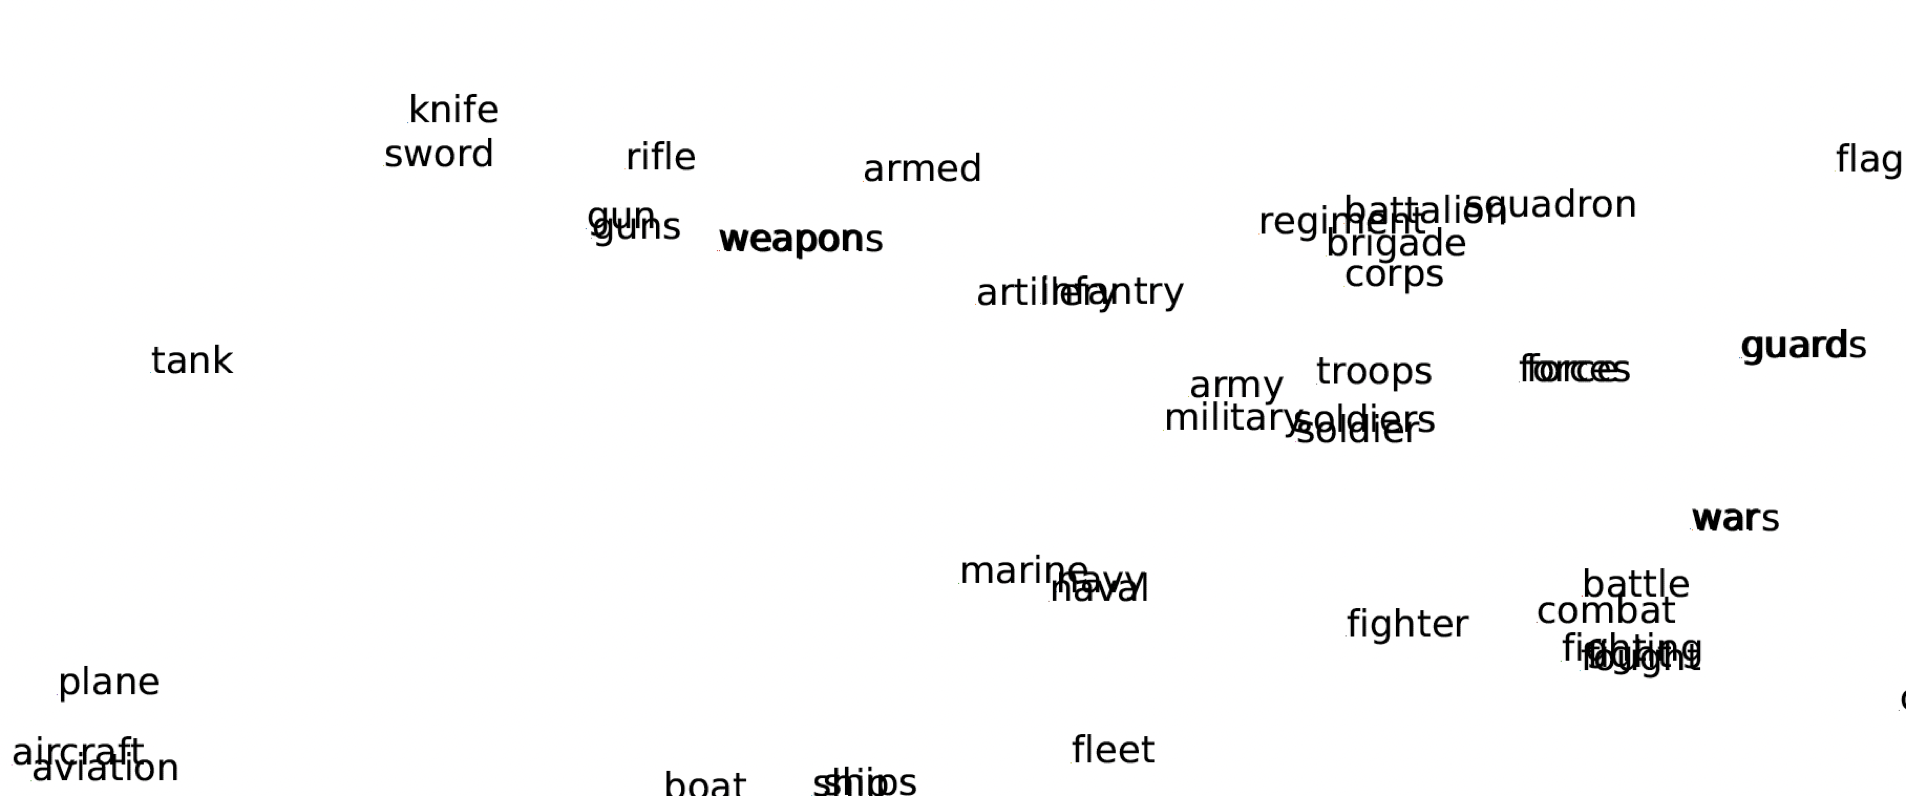

In [4]:
from IPython.display import Image
Image(filename='war_cluster.png')


This cluster is interesting as it has a range of words associated with military and warfare. With terms including both equipment and weapons, as well as military types etc.
 

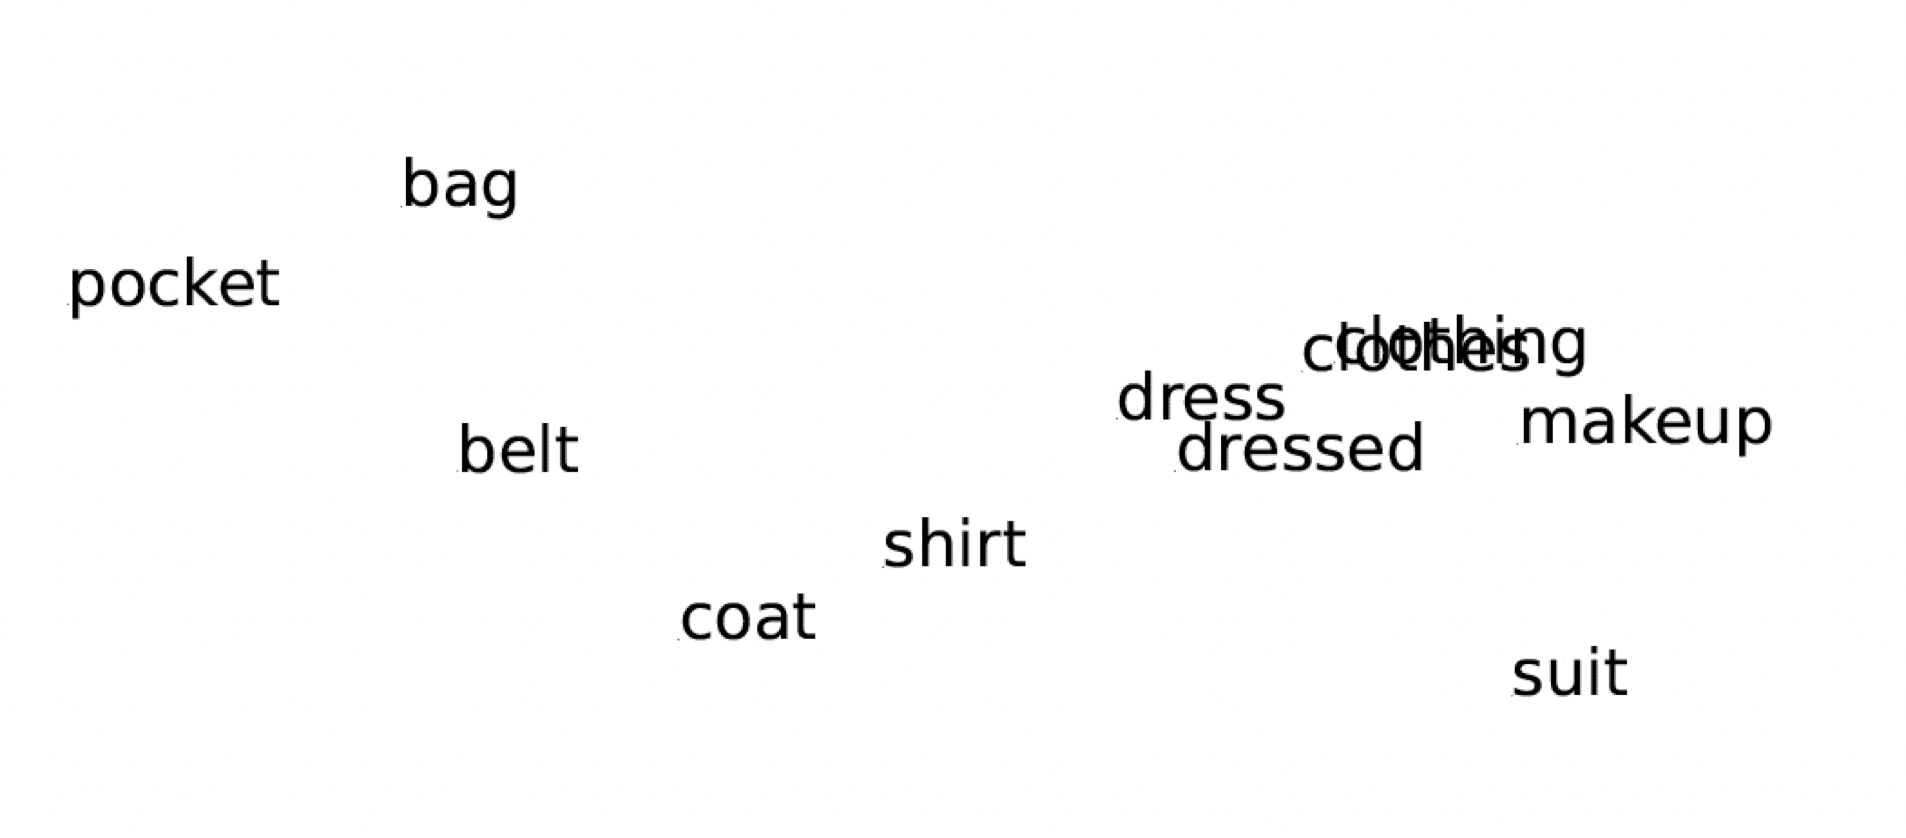

In [5]:
from IPython.display import Image
Image(filename='clothes_cluster.png')


This cluster is also very intersting as it is a list of clothes terms (such as coat, suit and packet) as well as list of adjectives that involves dressing. 